In [34]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


In [35]:
img = cv2.imread("./test images/Chalamet-63481 (cropped).jpg ....jpg")
img.shape

(275, 183, 3)

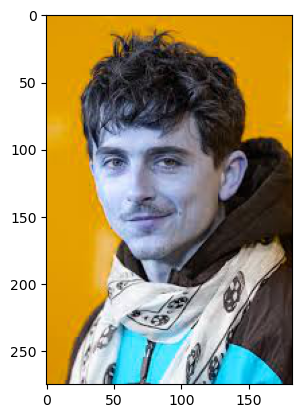

In [36]:
plt.imshow(img)
plt.show()

In [37]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(275, 183)

In [38]:
gray


array([[116, 116, 116, ..., 115, 115, 115],
       [116, 116, 116, ..., 115, 115, 115],
       [116, 116, 116, ..., 115, 115, 115],
       ...,
       [111, 113, 112, ...,  30,  26,  22],
       [111, 113, 112, ...,  31,  26,  23],
       [111, 113, 112, ...,  31,  26,  23]], dtype=uint8)

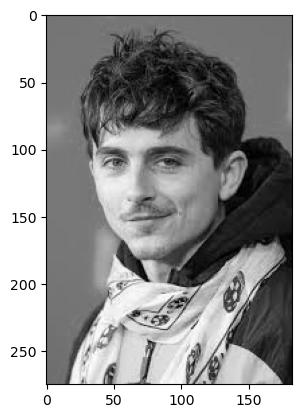

In [39]:
plt.imshow(gray, cmap = "gray")
plt.show()

In [40]:
face_cascade = cv2.CascadeClassifier("./haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./haarcascades/haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

error: OpenCV(4.10.0) C:\b\abs_e4cxka7_7g\croot\opencv-suite_1738943368733\work\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


In [41]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(53), np.int32(34), np.int32(81), np.int32(81))

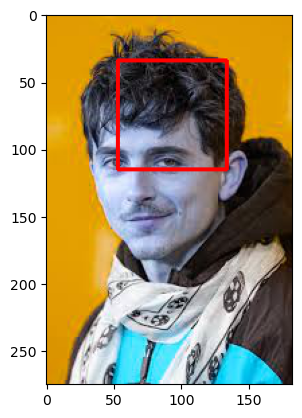

In [32]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)
plt.show()


In [33]:
cv2.destroyAllWindows()
for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = face_img[y:y + h, x:x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()


error: OpenCV(4.10.0) C:\b\abs_e4cxka7_7g\croot\opencv-suite_1738943368733\work\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'
